In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Load txt file into memory

In [73]:
data = pandas.read_csv('uber-raw-data-apr14.txt')

In [74]:
data

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


## covert date/time into Time stamp and add columns dom,weekday,hour

In [75]:
dt = '4/30/2014 23:22:00'

In [76]:
dt = pandas.to_datetime(dt)
dt

Timestamp('2014-04-30 23:22:00')

In [77]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)
data['Date/Time']

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

In [78]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [79]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [80]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analysis

### Analyze Date of Month

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

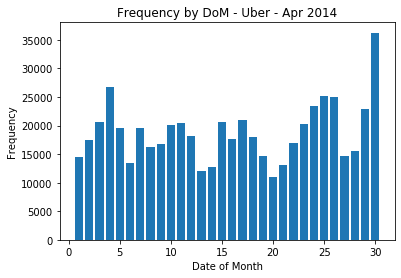

In [86]:
hist(data.dom, bins=30, rwidth = .8, range=(0.5,30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - Apr 2014')

#### for k, rows is data.groupby('dom'):
####   print(k,len(rows))
#### like pivot in excel



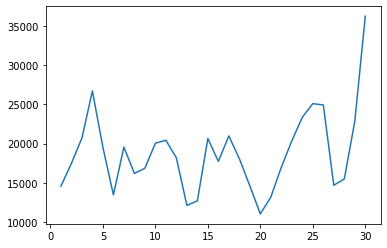

In [87]:
def count_rows(rows):
    return len(rows)
    
bydate= data.groupby('dom').apply(count_rows)
bydate
plot(bydate)


<BarContainer object of 30 artists>

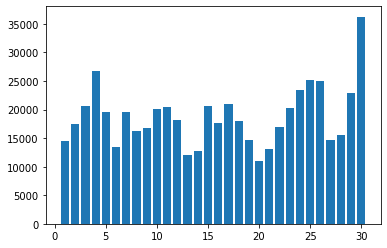

In [88]:
bar(range(1,31),bydate)

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

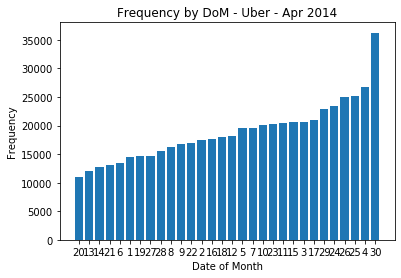

In [95]:
bydatesort =bydate.sort_values()
bydatesort
bar(range(1,31),bydatesort)
xticks(range(1,31),bydatesort.index);
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - Apr 2014')

### Analyze the Hour

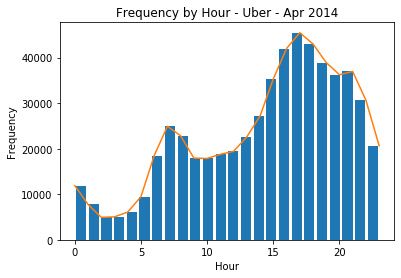

In [117]:
hist(data.hour, bins =24, rwidth=.8)
xlabel('Hour')
ylabel('Frequency')
title('Frequency by Hour - Uber - Apr 2014')

def count_rows(rows):
    return len(rows)
    
byhour= data.groupby('hour').apply(count_rows)
byhour
plot(byhour)

Text(0.5, 1.0, 'Frequency by Hour - Uber - Apr 2014')

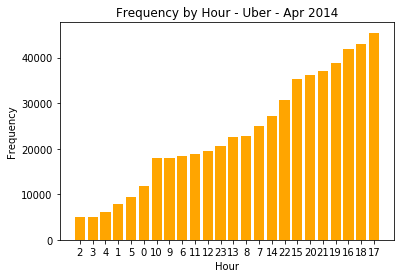

In [114]:
byhoursort =byhour.sort_values()
byhoursort
bar(range(0,24),byhoursort, color ='orange')
xticks(range(0,24),byhoursort.index);
xlabel('Hour')
ylabel('Frequency')
title('Frequency by Hour - Uber - Apr 2014')

### Analyze WEEKDAY

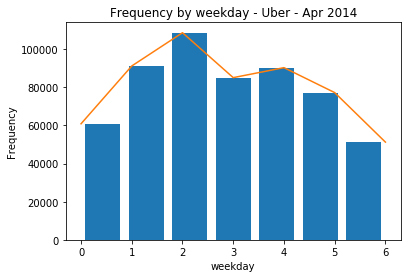

In [115]:
hist(data.weekday, bins =7, rwidth=.8)
xlabel('weekday')
ylabel('Frequency')
title('Frequency by weekday - Uber - Apr 2014')


def count_rows(rows):
    return len(rows)
    
byweekday= data.groupby('weekday').apply(count_rows)
byweekday
plot(byweekday)



Text(0.5, 1.0, 'Frequency by weekday - Uber - Apr 2014')

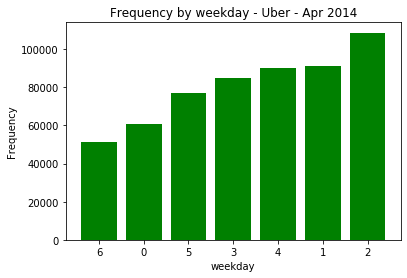

In [116]:
byweekdaysort =byweekday.sort_values()
byweekdaysort
bar(range(0,7),byweekdaysort, color ='green')
xticks(range(0,7),byweekdaysort.index);
xlabel('weekday')
ylabel('Frequency')
title('Frequency by weekday - Uber - Apr 2014')

### Cross Analysis - Hour Weekday

In [122]:
by_h_w =data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_h_w

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


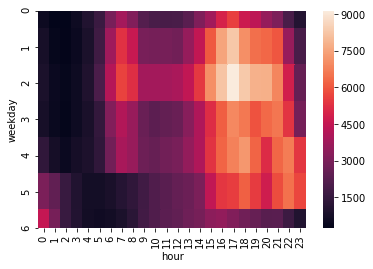

In [123]:
seaborn.heatmap(by_h_w)

### LAT LON

(array([4.0000e+00, 2.0000e+00, 6.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+01,
        7.0000e+00, 1.2000e+01, 9.0000e+00, 7.0000e+00, 2.0000e+01,
        1.0500e+02, 7.9000e+01, 1.0200e+02, 9.8000e+01, 1.7800e+02,
        2.3100e+02, 1.7200e+02, 3.2300e+02, 3.5400e+02, 4.2100e+02,
        3.7500e+02, 4.8200e+02, 5.2400e+02, 5.2530e+03, 7.0920e+03,
        8.2400e+02, 1.0590e+03, 1.5950e+03, 2.2880e+03, 3.9330e+03,
        5.3600e+03, 5.1670e+03, 7.4290e+03, 7.3860e+03, 4.7400e+03,
        7.4340e+03, 1.3992e+04, 1.5407e+04, 2.7908e+04, 4.0500e+04,
        3.4008e+04, 3.1918e+04, 3.3257e+04, 3.9590e+04, 3.1907e+04,
        3.7967e+04, 4.7042e+04, 4.4288e+04, 2.6032e+04, 2.6114e+04,
        1.6762e+04, 1.0481e+04, 6.4760e+03, 3.5860e+03, 2.1260e+03,
        1.8280e+03, 1.9020e+03, 8.7500e+02, 6.8100e+02, 6.0500e+02,
        7.3400e+02, 4.4100e+02, 3.3400e+02, 4.2700e+02, 2.9900e+02,
        5.2700e+02, 3.4300e+02, 2.7500e+02, 2.49

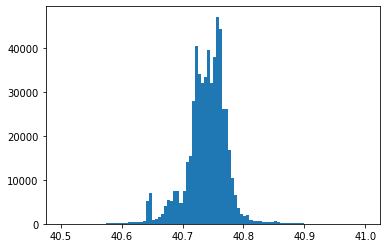

In [129]:
hist(data['Lat'], bins =100, range = (40.5,41))

(array([17220., 17526., 18169., 23910., 23954., 23677., 21939., 22366.,
        23890., 20952., 21333., 17280., 18932., 17021., 13497.,  9685.,
         8769.,  7274.,  9285.,  8955.,  8024.,  8619.,  8253.,  6746.,
         4823.,  4841.,  3486.,  3253.,  2224.,  1713.,  1660.,  1225.,
          993.,  1064.,  1017.,   888.,   911.,   895.,  1010.,   777.,
          830.,   535.,   512.,   502.,   408.,   376.,   390.,   313.,
          270.,   262.,   276.,   187.,   135.,   160.,   210.,   177.,
          418.,  1091.,   178.,   222.,   130.,   119.,   186.,  2979.,
         1241.,   120.,   770.,  2409.,  2217.,   287.,    90.,   119.,
           81.,   132.,   185.,   136.,   162.,   238.,   140.,    85.,
           94.,   124.,    91.,   100.,   128.,    84.,   102.,    91.,
           51.,    73.,    94.,    56.,   119.,    51.,    44.,    68.,
           99.,    39.,   103.,    72.]),
 array([-74.   , -73.998, -73.996, -73.994, -73.992, -73.99 , -73.988,
        -73.986, -73.98

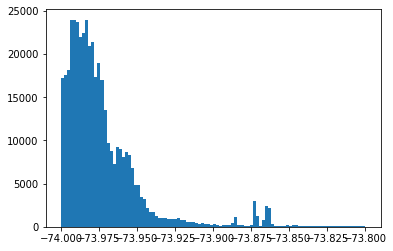

In [131]:
hist(data['Lon'], bins =100, range = (-74,-73.8))

''

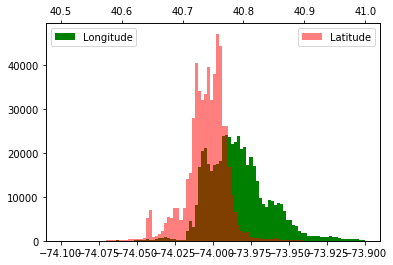

In [145]:
hist(data['Lon'], bins =100, range = (-74.1,-73.9), color = 'green', label= 'Longitude')
legend(loc ='upper left')
twiny()

hist(data['Lat'], bins =100, range = (40.5,41), color = 'red', alpha =.5, label = 'Latitude')
legend(loc ='best')
;

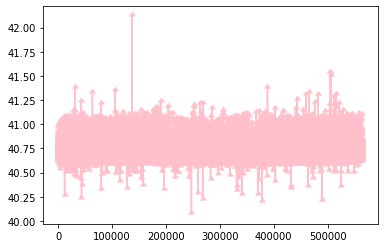

In [159]:
plot(data['Lat'], marker = 10, color = 'pink')


(40.7, 41)

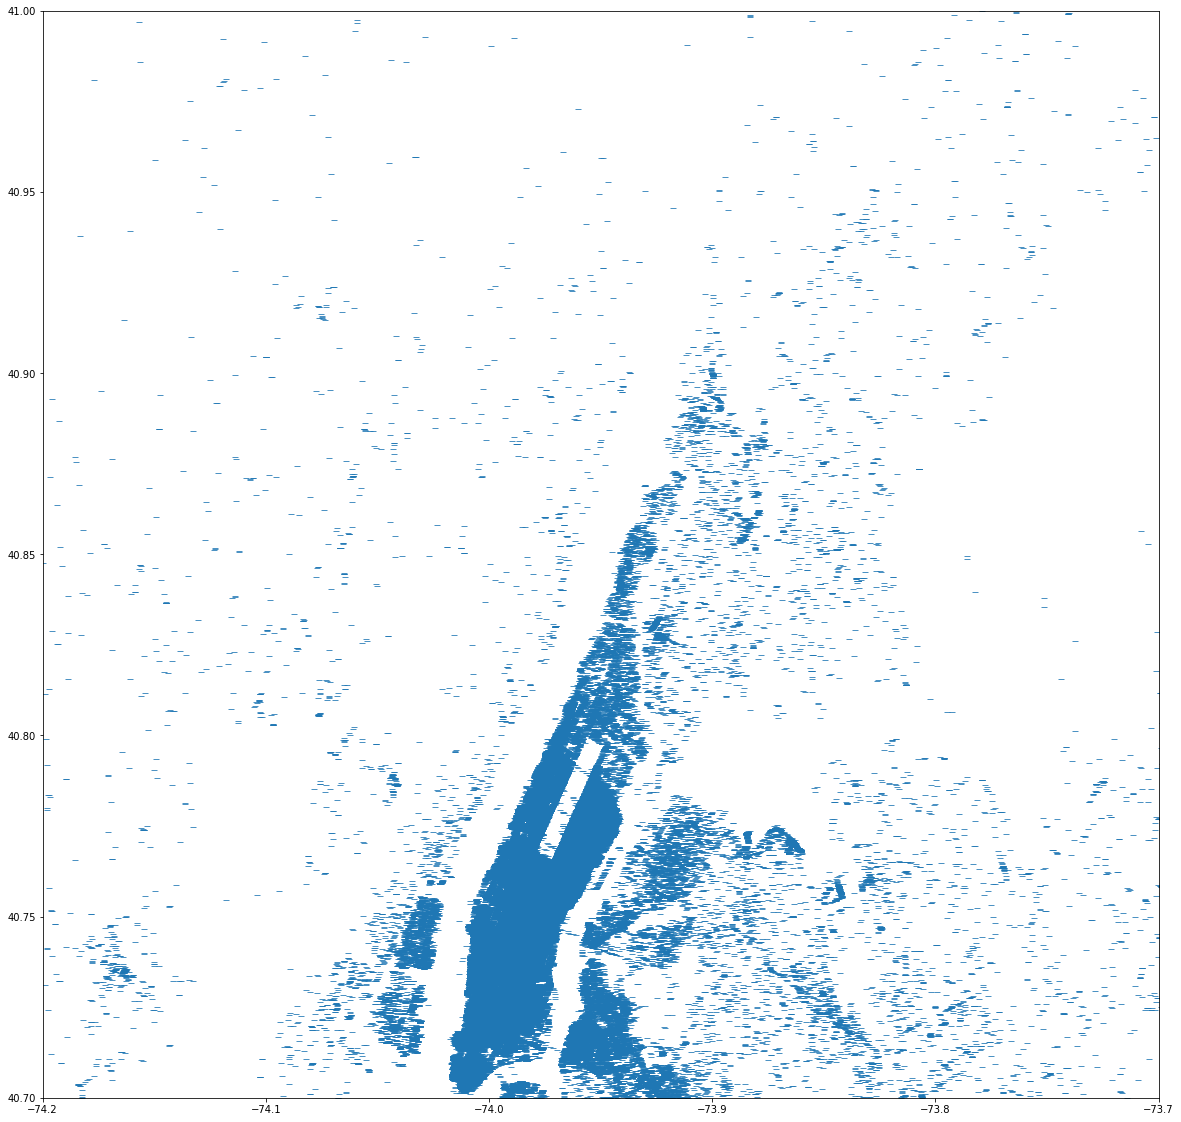

In [164]:
figure(figsize= (20,20))
plot(data['Lon'], data['Lat'], '.', marker = 1, alpha = .8)
xlim(-74.2,-73.7)
ylim(40.7,41)